In [3]:
# Prerequisites:
# 1. Jupyter notebook - pip install jupyter
# 1. pandas (required library for data processing) - pip install pandas
# 2. openpyxl (Read excel files to dataframe) - pip install openpyxl
# 3. matplotlib (for data visualization) - pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

In [12]:
#Read excel and convert to dataframe

df = pd.read_excel("./Daily Update Data Agregat Covid-19 Jakarta.xlsx") 
df.corr()

,Jam,Total Pasien,Sembuh,Meninggal,Self Isolation,Masih Perawatan,Belum Diketahui (masih verifikasi),Menunggu Hasil,Tenaga Kesehatan Terinfeksi,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,Bergejala,Belum Ada Data
Jam,1.000000,-0.201448,-0.198483,-0.230393,-0.132519,-0.148591,NaN,0.259202,0.183980,-0.123432,-0.139430,-0.122957,NaN,NaN,NaN
Total Pasien,-0.201448,1.000000,0.996972,0.995309,0.562280,0.700594,NaN,0.987751,0.952911,0.652852,0.610901,0.543386,-0.306730,0.395466,0.454925
Sembuh,-0.198483,0.996972,1.000000,0.996530,0.496789,0.647026,NaN,0.969945,0.968792,0.595106,0.547497,0.498710,-0.364562,0.319351,0.382631
Meninggal,-0.230393,0.995309,0.996530,1.000000,0.512045,0.665341,NaN,0.956281,0.919678,0.605485,0.563880,0.500357,-0.353754,0.335575,0.402224
Self Isolation,-0.132519,0.562280,0.496789,0.512045,1.000000,0.909166,NaN,0.908296,0.861242,0.960372,0.993350,0.776922,0.383065,0.854495,0.834911
Masih Perawatan,-0.148591,0.700594,0.647026,0.665341,0.909166,1.000000,NaN,0.994639,0.962064,0.921713,0.951064,0.706132,0.252429,0.817765,0.854204
Belum Diketahui (masih verifikasi),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Menunggu Hasil,0.259202,0.987751,0.969945,0.956281,0.908296,0.994639,NaN,1.000000,0.969053,0.720512,0.984758,0.229478,NaN,NaN,NaN
Tenaga Kesehatan Terinfeksi,0.183980,0.952911,0.968792,0.919678,0.861242,0.962064,NaN,0.969053,1.000000,0.724339,0.948346,0.164371,NaN,NaN,NaN
Positif Harian,-0.123432,0.652852,0.595106,0.605485,0.960372,0.921713,NaN,0.720512,0.724339,1.000000,0.967415,0.825542,0.274558,0.787791,0.865303


In [5]:
# Declares positif_harian as a series from "Positif Harian" column

positif_harian = df['Positif Harian'] 

In [6]:
# Uses pandas methods to find required values and skip if there are any empty or nan cell(s)

positif_harian_mean = positif_harian.mean(skipna=True)
positif_harian_median = positif_harian.median(skipna=True)
positif_harian_mode = positif_harian.mode(dropna=True)
positif_harian_min = positif_harian.min(skipna=True)
positif_harian_max = positif_harian.max(skipna=True)

In [7]:
# Finds min and max value from positif_harian using describe()

positif_harian.describe() 

count      503.000000
mean      1445.359841
std       2245.317226
min          0.000000
25%        219.000000
50%        890.000000
75%       1447.500000
max      14619.000000
Name: Positif Harian, dtype: float64

In [8]:
# Prints required value

print("Mean Positif Harian   : %.5f" % (positif_harian_mean))
print("Median Positif Harian : %.5f" % (positif_harian_median))
print("Modus Positif Harian  : %.5f" % (positif_harian_mode))
print("Min Positif Harian    : %.5f" % (positif_harian_min))
print("Max Positif Harian    : %.5f" % (positif_harian_max))

Mean Positif Harian   : 1445.35984
Median Positif Harian : 890.00000
Modus Positif Harian  : 0.00000
Min Positif Harian    : 0.00000
Max Positif Harian    : 14619.00000


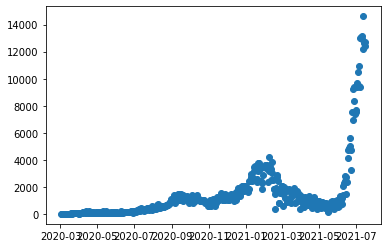

In [9]:
# Visualises correlation between timestamps and Positif Harian using scatter plot

tanggal = df["Tanggal Jam"]

fig = plt.figure()

x = tanggal
y = positif_harian

plt.scatter(x, y)
plt.show()

In [10]:
# Using interquartile range comparison to find outlier
# Reference: https://medium.datadriveninvestor.com/finding-outliers-in-dataset-using-python-efc3fce6ce32

q1 = 219
q3 = 1447.5

# 1.5 for mild outlier
# 3 for extreme outlier

iqr = q3 - q1
print(iqr)

lower_bound = q1 - (3 * iqr)
upper_bound = q3 + (3 * iqr)
print("Lower: {}, Upper: {}".format(lower_bound, upper_bound))

outliers = []
def define_outlier(dataset):
    for data in dataset:
        if data < lower_bound or data > upper_bound:
            outliers.append(data)
    return outliers

foundOutlier = define_outlier(sorted(positif_harian))
print(foundOutlier)

1228.5
Lower: -3466.5, Upper: 5133.0
[5582, 6934, 7379, 7505, 7541, 7680, 8348, 9271, 9366, 9394, 9399, 9439, 9702, 10485, 10903, 12182, 12415, 12667, 12691, 12920, 12974, 13112, 13133, 14619]


In [11]:
# Find outlier using z score

import numpy as np
outliers = []
def find_outlier(dataset):
    batas = 3
    mean = np.mean(dataset)
    std = np.std(dataset)
    
    for data in dataset:
        z_score = (data - mean) / std
        #print(z_score)
        if np.abs(z_score) > batas:
            outliers.append(data)
    return outliers

list_positif_harian = positif_harian.tolist()
foundOutliers = find_outlier(list_positif_harian)
print(foundOutliers)

[9271, 9394, 8348, 9399, 9702, 10485, 10903, 9439, 9366, 12974, 13112, 12920, 13133, 14619, 12182, 12667, 12691, 12415]
